# Nivell 1

## Exercici 1: Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

Tenim quatre grups d'estadistica al Numpy: [1]
* Order statistics
* Averages and variances
* Correlating
* Histograms

Les Order i Correlating necessiten arrays de mes de una dimensio, per tant nomes utilitzarem per aquest problema les funcions en la carpeta de Averages and Variances a part de l'histograma simple (histogram(x,[bins,range,...])

En Averages i variances tambe trobem les funcions anomenades "nanmean", "nanmedian", "nanstd", i "nanvar", les quals tenen la caracteristica d'operar, com les anteriors, pero sense tenir els NaNs, es a dir, quan ens falten dades a les llistes ens donaran el resultat sobre els valors no nuls de llista en comptes de obtenir un error.

referencies:
[1] https://numpy.org/doc/stable/reference/routines.statistics.html

Mean:  49.321
Average:  49.321
Median:  49.0
std:  29.47897486345141
variance:  869.009959


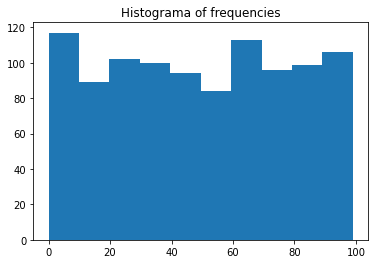

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def stats(A):
    if A.ndim != 1:
        return 'Only 1D Arrays!'
    else:
        #Taking the ones on the documentation: mean, median, std, and, var
        meanA = np.mean(A)
        print('Mean: ', meanA)
        averageA = np.average(A)
        print('Average: ', averageA)
        medianA = np.median(A)
        print('Median: ', medianA)
        stdA = np.std(A)
        print('std: ', stdA)
        varA = np.var(A)
        print('variance: ',varA)

        # plot histograma with frequences
        plt.hist(A)
        plt.title('Histograma of frequencies')
        plt.show()
        




array = np.array(np.random.randint(0,100,1000)) # canviar per input
stats(array)



## Exercici 2: Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [51]:
#function that creates a square of NxN random values between 0 and 100
def quad(n):
    mat = np.random.randint(0,100,(n,n))
    return mat


n = input('Dimensio del quadrat: N=' )
n = int(n)
quad(n)

Dimensio del quadrat: N=1000
[[ 6 55 42 ...  8 66 97]
 [15 62 18 ... 99 58 10]
 [95 28 76 ...  6 30 92]
 ...
 [75 51 30 ... 80  0 75]
 [85 41 78 ... 33 56 84]
 [77 65 87 ... 47 41 36]]
Aquest quadrat te dimensions:  (1000, 1000)


## Exercici 3: Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna. 

En python hi ha diverses maneres de crear una taula de dues dimensions:

* Fer un array de Nx2.

* Utilitzar la lliberia pandas.

* Utilitzar la lliberia tabulate (la qual no es troba instal.lada per defecte al Jupyter).

Per aquest exercici nomes utilitzare les dues primeres.

In [36]:
import numpy as np
import pandas as pd

# function that sums the columns and the rows of a table
def sumarray(x,y):
    taula = np.column_stack((x,y))
    print('La suma de cadascuna de les files es:')
    print( np.sum(taula,axis=1))
    print('La suma de les columnes es:')
    return(np.sum(taula,axis= 0))
    
    
# function that uses the pandas library to sum columns and rows.
def sumpanda(x,y):
    df = pd.DataFrame({'x' : x, 'y': y})
    # totals per fila:
    print(df.sum(axis=1))
    # totals per columna
    return (df.sum(axis=0))



x = np.array((1,2,4,5,8))
y = np.array((5,20,40,80,100))
print('Utilitzant la funcio sumarray(x,y)')
print(sumarray(x,y))

print('Utilitzant la funcio sumpanda(x,y)')
print(sumpanda(x,y))

Utilitzant la funcio sumarray(x,y)
La suma de cadascuna de les files es:
[  6  22  44  85 108]
La suma de les columnes es:
[ 20 245]
Utilitzant la funcio sumpanda(x,y)
0      6
1     22
2     44
3     85
4    108
dtype: int64
x     20
y    245
dtype: int64


## Exercici 4: Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

**Coeficient de correlacio** o Pearson's correlation coefficient : Es defineix com el quocient de la *covariancia* de les variables $x$ i $y$ ($\sigma_{xy}$) entre la *desviacio estandar* de $x$ ($\sigma_{x}$) per la *desviacio estandar* de $y$ ($\sigma_y$).
$$r=\frac{\sigma_{xy}}{\sigma_x\sigma_y} = \frac{1}{N}\frac{\sum_i (x_i - \mu_{x})(y_i - \mu_{y})}{\sigma_x \sigma_y} \mbox{ a on } \mu_{x}= \mbox{ mitjana de x i }\mu_{y}=\mbox{mitjana de y.}$$

Definim la *desviacio estandar* ($\sigma$ o arrel quadrada de la varianca) la mesura de l'incertesa aleatoria associada a cadascuna de les mesures. Juntament amb la mitjana ens mostra el nivell de confianca en que es troben les nostres mesures. En analisis de dades l'interval de confianca mes comu es el de 95%, ens diu que la mesura presa te una probabilitat del 95% d'estar entre $\mu - 2\sigma$ i $\mu + 2\sigma$ (a on $\mu$ es la mitjana).

La *covariancia* es la desviacio estandar entre dos o mes variables i mostra el grau de correlacio entre les variables. Per variables independents, la covariancia sera zero. Quan la covariancia$> 0$ la variable $y$ tendeix a augmentar com augmenta la $x$. Per covariancies negatives($<0$) la $y$ decreix quan $x$ augmenta.

**Interpretacio i usos** 

El coeficient de correlacio mesura el grau de correlacio entre dues variables. Es a dir, si tenim un conjunt de dades $\{x,y \}$ que es relacionen com: y=f(x), la correlacio vindra donda per un valor en l'interval $-1 \leq r \leq 1$.

* Per $r= 1$ o $r=-1$. Les variables estan relaciones per una llei lineal exacte. 

* Per $r\rightarrow 0$. Les variables x i y son independents entre elles. Cal tenir en compte que a mes a mes el coeficient de correlacio disminueix a mesura que incrementem el nombre de mesures (les variables aleatories $x$ i $y$ esdevenen independents entre si).

* Per $-1< r < 1$. Les variables x i y estan parcialment correlacionades. Per $r>0$ les dades x i y es diu que es troben correlacionades, mentre que $r<0$ es diu que estan anti-correlacionades. Segueixen amb mes o menys grau una llei lineal.

El cas de r igual a 1 o -1, per dades experimentals, es considera el cas ideal, sempre obtenim lleus fluctuacions entre $x$ i $y$ ja causades per el experimentador al pendre les dades o per la poca pressicio dels aparells. 

La equacio (1) es util per l'ajust de models, mentre que l'equacio (2) s'utilitza per el cas de mostreig.

Per dues o mes vairables, el coefficient de correlacio es mapeja com una matriu de "pairwise" correlacions. 
$$r = \left(\begin{array}{c c} r_{xx} & r_{xy} \\ r_{yx} & r_{yy} \end{array}\right)$$

A on $r_{xx}=r_{yy}=1$, ja que la variable esta correlacionda en si mateixa, i $r_{xy}=r_{yx}$ son iguals, ja que no importa l'ordre en que es fan les operacions, i dona simetria a la matriu.

Per el cas de mes de dues variables aletories si volem extreure informacio a la matriu de correlacio necessitem utilitzar el que s'anomena un "threshold", el qual ens ajudara en determinar quin es el grau significancia de la correlacio. El threshold mes comu utilitzat es la desviacio estandar de la variable sobre la qual volem determinar la significancia. Aquest cas es molt util si, per exemple, en un dataframe tenim diverses "features" i volem saber com cada una d'aquestes features afecta a una feature en concret. Per exemple, en el cas de tenir un dataframe amb el qual volem determinar els preus de cases, amb la cross correlation despres d'aplicar-hi el threshold, podem determinar (per simplificar l'exemple) si afecta mes el preu de la casa el tenir piscina o el tenir quatre habitacions.

Referencies: 

http://diposit.ub.edu/dspace/bitstream/2445/1741/1/apunts-octubre2007.pdf

https://mathworld.wolfram.com/Covariance.html

https://mathworld.wolfram.com/StandardDeviation.html

https://mathworld.wolfram.com/CorrelationCoefficient.html

En l'exercici he fet les dues versions del coefficient de correlacio:

* La funcio corr_coef(x,y) correspont a la de la funcio (1).

* La funcio corr_coef2(x,y) es la mateixa pero utilitznat les definicions de l'estandard desviation en comptes de la funcio built-in de la std().
$$r =\frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_j (x_j - \bar{x})^2 \sum_k (y_k - \bar{y})^2}}$$


In [37]:
# correlation coefficien function
import numpy as np

def corr_coef(x,y):
    # number of samples:
    n = len(x)
    # means
    meanx = np.mean(x)
    meany = np.mean(y)
    
    # standard deviation
    sigmax = np.std(x)
    sigmay = np.std(y)
    
    #covariance:
    covxy = 0
    for i in range(0,n):
        covxy = covxy + (x[i]-meanx)*(y[i]-meany)
        
    #correlation coefficient
    r = (1/n)*(covxy / (sigmax*sigmay))
    return r

def corr_coef2(x,y):
    n = len(x)
    #averages
    avex = np.mean(x)
    avey = np.mean(y)
    
    covxy2 = 0
    sigx = 0
    sigy = 0
    for i in range(0,n):
        covxy2 = covxy2 + (x[i]-avex)*(y[i]-avey)
        sigx = sigx + (x[i]-avex)**2
        sigy = sigy + (y[i]-avey)**2
    
    rr = covxy2 / np.sqrt(sigx*sigy)
    return rr
    
    
# picking some values for the variables x and y to calculate the coefficient coeficients:
x = [1,2,4,5,8]
y = [5,20,40,80,100]
print('El coefficient de correlacio es: ', corr_coef(x,y))
print('El coefficient de correlacio es:', corr_coef2(x,y))

El coefficient de correlacio es:  0.9684133966182732
El coefficient de correlacio es: 0.968413396618273
